## Data Preprocessing

## Importing the libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [17]:
import pandas as pd

dataset = pd.read_csv('merged_stock_sentiment_data.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset = dataset.sort_values('Date')

for col in ['Adj Close', 'Close', 'High', 'Low', 'Open']:
    dataset[f'{col}_lag1'] = dataset[col].shift(1)

dataset = dataset.dropna()

dataset['Target'] = dataset['Target'].replace(0, 1)

X = dataset[['Adj Close', 'Close', 'High', 'Low', 'Open',
             'Adj Close_lag1', 'Close_lag1', 'High_lag1', 'Low_lag1', 'Open_lag1']].values
y = dataset['Target'].values

## Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

dataset['Target'] = dataset['Target'].replace(0, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [19]:
print(X_train)

[['239.7066650390625' '239.7066650390625' 255.54666137695312 ...
  121.3000030517578 116.0999984741211 119.98999786376952]
 ['142.78843688964844' '144.2899932861328' 144.33999633789062 ...
  144.33999633789062 142.27999877929688 142.6999969482422]
 ['13.579999923706056' '13.579999923706056' 13.733332633972168 ...
  13.733332633972168 13.423999786376951 13.682666778564451]
 ...
 ['176.4618682861328' '177.55999755859375' 178.2100067138672 ...
  178.2100067138672 173.5399932861328 175.17999267578125]
 ['209.97999572753903' '209.97999572753903' 220.8000030517578 ...
  220.8000030517578 206.67999267578125 219.75]
 ['38.32799911499024' '38.32799911499024' 38.34999847412109 ...
  26.912500381469727 26.545000076293945 26.5674991607666]]


In [20]:
print(y_train)

[-1. -1.  1. ...  1. -1.  1.]


In [21]:
print(X_test)

[['174.72999572753906' '174.72999572753906' 176.3699951171875 ...
  176.3699951171875 174.25999450683594 175.6999969482422]
 ['169.1999969482422' '169.1999969482422' 169.74600219726562 ...
  151.97000122070312 149.82000732421875 150.38999938964844]
 ['180.4499969482422' '180.4499969482422' 182.33999633789065 ...
  183.8000030517578 177.13999938964844 177.30999755859375]
 ...
 ['197.14419555664065' '198.1100006103516' 199.6199951171875 ...
  253.8800048828125 240.7899932861328 241.22000122070312]
 ['197.4100036621093' '197.4100036621093' 198.32000732421875 ...
  198.32000732421875 191.3600006103516 194.0]
 ['130.35678100585938' '133.11000061035156' 135.52999877929688 ...
  135.52999877929688 131.80999755859375 135.02000427246094]]


In [22]:
print(y_test)

[ 1. -1. -1. ... -1. -1.  1.]


## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
print(X_train)

[[ 0.99623827  0.99286012  1.13051814 ... -0.53697187 -0.55649585
  -0.5305404 ]
 [-0.23478979 -0.22362426 -0.25296919 ... -0.25023145 -0.21397625
  -0.24104236]
 [-1.875959   -1.89006957 -1.87780584 ... -1.87567505 -1.89983207
  -1.88570401]
 ...
 [ 0.19292066  0.20054103  0.16839701 ...  0.17129216  0.19500621
   0.17299972]
 [ 0.61865848  0.61386944  0.69824583 ...  0.7013389   0.62858526
   0.74116046]
 [-1.56161688 -1.57455286 -1.5715576  ... -1.7116559  -1.72816668
  -1.72145328]]


In [25]:
print(X_test)

[[ 0.1709229   0.16446082  0.145506   ...  0.1483926   0.20442617
   0.17962853]
 [ 0.10068241  0.09395787  0.06309898 ... -0.15527349 -0.1153284
  -0.14301326]
 [ 0.24357675  0.23738615  0.21977692 ...  0.24086153  0.24210601
   0.20015217]
 ...
 [ 0.45562176  0.46253673  0.43475198 ...  1.11303059  1.07485507
   1.0148515 ]
 [ 0.45899798  0.45361234  0.41857924 ...  0.42156784  0.4281499
   0.41290969]
 [-0.39269319 -0.36616001 -0.36257162 ... -0.35987481 -0.35095794
  -0.33894385]]


## Training the Logistic Regression model on the Training set

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [27]:
print(classifier.predict(sc.transform([[8.53, 10.11, 10.13, 9.85, 9.86, 8.50, 10.05, 10.09, 9.80, 9.83]])))

[1.]


## Predicting the Test set results

In [28]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 ...
 [ 1. -1.]
 [-1. -1.]
 [ 1.  1.]]


## Making the Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))

[[1697  694]
 [ 675 1385]]
0.6924286677151202
0.6908078415245363
0.6910374868540197


## KNN

# Training the KNN model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Predicting a new result

In [32]:
print(classifier.predict(sc.transform([[8.53, 10.11, 10.13, 9.85, 9.86, 8.50, 10.05, 10.09, 9.80, 9.83]])))

[1.]


# Predicting the test results

In [33]:
y_pred_knn = classifier.predict(X_test)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn),1), y_test.reshape(len(y_test),1)),1))

[[ 1.  1.]
 [ 1. -1.]
 [-1. -1.]
 ...
 [ 1. -1.]
 [-1. -1.]
 [ 1.  1.]]


# Making the Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
print(accuracy_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn, average='macro'))
print(recall_score(y_test, y_pred_knn, average='macro'))

[[1973  418]
 [ 327 1733]]
0.8326218827229837
0.8317489337618499
0.8332199429088857


# SVM

# Training SVM model

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting test results

In [38]:
y_pred_svm = classifier.predict(X_test)
print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.reshape(len(y_test),1)),1))

[[ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 ...
 [ 1. -1.]
 [-1. -1.]
 [ 1.  1.]]


## Making Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
print(accuracy_score(y_test, y_pred_svm))
print(precision_score(y_test, y_pred_svm, average='macro'))
print(recall_score(y_test, y_pred_svm, average='macro'))

[[1637  754]
 [ 579 1481]]
0.7005167378117277
0.7006791162907147
0.7017914062848952


## Kernel SVM

# Training Kernel SVM model

In [41]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Predicting test results

In [42]:
y_pred_kernel = classifier.predict(X_test)
print(np.concatenate((y_pred_kernel.reshape(len(y_pred_kernel),1), y_test.reshape(len(y_test),1)),1))

[[ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 ...
 [ 1. -1.]
 [-1. -1.]
 [ 1.  1.]]


# Making confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_kernel)
print(cm)
print(accuracy_score(y_test, y_pred_kernel))
print(precision_score(y_test, y_pred_kernel, average='macro'))
print(recall_score(y_test, y_pred_kernel, average='macro'))

[[1581  810]
 [ 354 1706]]
0.738485733543024
0.7475573384602112
0.7446924754236153


# Naive Bayes

# Training Naive Bayes model

In [45]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting test results

In [46]:
y_pred_naive = classifier.predict(X_test)
print(np.concatenate((y_pred_naive.reshape(len(y_pred_naive),1), y_test.reshape(len(y_test),1)),1))

[[ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 ...
 [ 1. -1.]
 [-1. -1.]
 [ 1.  1.]]


# Making confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_naive)
print(cm)
print(accuracy_score(y_test, y_pred_naive))
print(precision_score(y_test, y_pred_naive, average='macro'))
print(recall_score(y_test, y_pred_naive, average='macro'))

[[1149 1242]
 [ 354 1706]]
0.641428892383734
0.6715842399326177
0.6543537050346566


## Decision Tree

# Training Decision Tree model

In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predicting Test results

In [49]:
y_pred_decision = classifier.predict(X_test)
print(np.concatenate((y_pred_decision.reshape(len(y_pred_decision),1), y_test.reshape(len(y_test),1)),1))

[[ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 ...
 [-1. -1.]
 [-1. -1.]
 [ 1.  1.]]


# Making Confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_decision)
print(cm)
print(accuracy_score(y_test, y_pred_decision))
print(precision_score(y_test, y_pred_decision, average='macro'))
print(recall_score(y_test, y_pred_decision, average='macro'))

[[2149  242]
 [ 218 1842]]
0.8966524376544597
0.8958887275210082
0.896480937821036


# Random Forest

# Training Random Forest model

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Predicting Test Results

In [53]:
y_pred_rf = classifier.predict(X_test)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 ...
 [-1. -1.]
 [-1. -1.]
 [ 1.  1.]]


# Making confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
print(accuracy_score(y_test, y_pred_rf))
print(precision_score(y_test, y_pred_rf, average='macro'))
print(recall_score(y_test, y_pred_rf, average='macro'))

[[2175  216]
 [ 197 1863]]
0.9072118625028084
0.9065258097720155
0.9070150808249382


# ROC curve comparison of all models

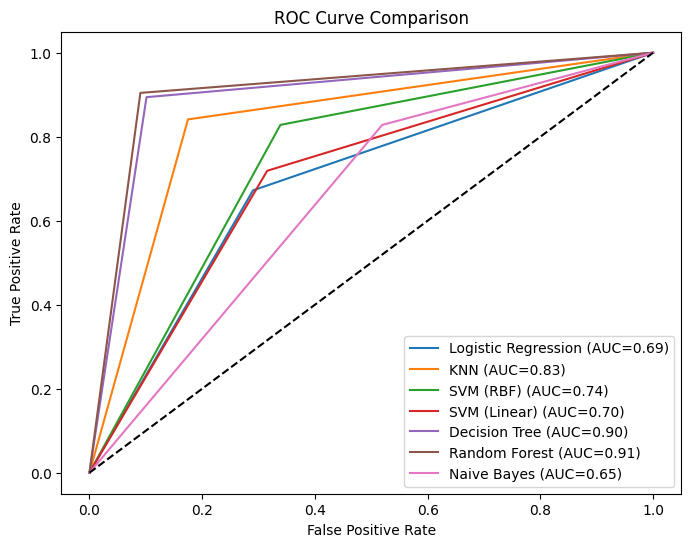

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm_kernel, tpr_svm_kernel, _ = roc_curve(y_test, y_pred_kernel)
roc_auc_svm_kernel = auc(fpr_svm_kernel, tpr_svm_kernel)

fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm_linear = auc(fpr_svm_linear, tpr_svm_linear)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_decision)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_naive)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC={roc_auc_log:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC={roc_auc_knn:.2f})")
plt.plot(fpr_svm_kernel, tpr_svm_kernel, label=f"SVM (RBF) (AUC={roc_auc_svm_kernel:.2f})")
plt.plot(fpr_svm_linear, tpr_svm_linear, label=f"SVM (Linear) (AUC={roc_auc_svm_linear:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={roc_auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_rf:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC={roc_auc_nb:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

